# Assignment

## Is Dhoni still good enough to bat?

In [2]:
# Criteria to consider:
# Data: IPL 2021 & IPL 2022
# Metrics: Runs scored, minimum balls faced, Strike rate
# Comparison with other batters in the same seasons

In [3]:
# Importing Warnings & required libraries.
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [4]:
# Reading the data.
df = pd.read_csv('IPL_ball_by_ball_updated.csv')
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
225948,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",1,13.6,Rajasthan Royals,Gujarat Titans,SO Hetmyer,R Ashwin,Rashid Khan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225949,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",1,14.1,Rajasthan Royals,Gujarat Titans,SO Hetmyer,R Ashwin,HH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225950,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",1,14.2,Rajasthan Royals,Gujarat Titans,R Ashwin,SO Hetmyer,HH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225951,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",1,12.2,Rajasthan Royals,Gujarat Titans,R Ashwin,SO Hetmyer,HH Pandya,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225952,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,18.1,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,OC McCoy,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Filtering the seasons data of IPL2021 & IPL2022.
df = df[(df.season >= 2021) & (df.season <= 2022)]
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
193616,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",2,6.5,Royal Challengers Bangalore,Mumbai Indians,V Kohli,GJ Maxwell,KH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193617,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",2,6.6,Royal Challengers Bangalore,Mumbai Indians,GJ Maxwell,V Kohli,KH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193618,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",2,5.5,Royal Challengers Bangalore,Mumbai Indians,RM Patidar,V Kohli,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193619,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",2,7.2,Royal Challengers Bangalore,Mumbai Indians,GJ Maxwell,V Kohli,RD Chahar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193620,1254058,2021,2021-04-09,"MA Chidambaram Stadium, Chepauk, Chennai",2,7.1,Royal Challengers Bangalore,Mumbai Indians,GJ Maxwell,V Kohli,RD Chahar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
225948,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",1,13.6,Rajasthan Royals,Gujarat Titans,SO Hetmyer,R Ashwin,Rashid Khan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225949,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",1,14.1,Rajasthan Royals,Gujarat Titans,SO Hetmyer,R Ashwin,HH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225950,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",1,14.2,Rajasthan Royals,Gujarat Titans,R Ashwin,SO Hetmyer,HH Pandya,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225951,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",1,12.2,Rajasthan Royals,Gujarat Titans,R Ashwin,SO Hetmyer,HH Pandya,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225952,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,18.1,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,OC McCoy,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Checking all strikers in the two seasons.
df.striker.unique()

array(['V Kohli', 'GJ Maxwell', 'RM Patidar', 'Washington Sundar',
       'HV Patel', 'DT Christian', 'AB de Villiers', 'KA Jamieson',
       'Mohammed Siraj', 'Shahbaz Ahmed', 'RG Sharma', 'CA Lynn',
       'SA Yadav', 'HH Pandya', 'Ishan Kishan', 'KA Pollard', 'KH Pandya',
       'M Jansen', 'JJ Bumrah', 'S Dhawan', 'PP Shaw', 'SM Curran',
       'RR Pant', 'MP Stoinis', 'RA Jadeja', 'RD Gaikwad', 'SK Raina',
       'MM Ali', 'AT Rayudu', 'F du Plessis', 'MS Dhoni', 'JM Bairstow',
       'MK Pandey', 'DA Warner', 'WP Saha', 'Abdul Samad',
       'Mohammad Nabi', 'V Shankar', 'Shakib Al Hasan', 'N Rana',
       'Shubman Gill', 'RA Tripathi', 'AD Russell', 'EJG Morgan',
       'KD Karthik', 'JC Buttler', 'SV Samson', 'S Dube', 'M Vohra',
       'R Parag', 'R Tewatia', 'CH Morris', 'BA Stokes', 'JA Richardson',
       'CH Gayle', 'KL Rahul', 'MA Agarwal', 'DJ Hooda', 'N Pooran',
       'M Shahrukh Khan', 'PJ Cummins', 'Harbhajan Singh', 'RD Chahar',
       'Q de Kock', 'S Nadeem', 'JO H

In [16]:
# Considering the striker 'MS Dhoni' as part of this analysis.
# Creating a new dataframe for analysing Dhoni's statistics.
msdf = df[df['striker'] == 'MS Dhoni']
msdf.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
194049,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,15.2,Chennai Super Kings,Delhi Capitals,MS Dhoni,RA Jadeja,Avesh Khan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194050,1254059,2021,2021-04-10,"Wankhede Stadium, Mumbai",1,15.3,Chennai Super Kings,Delhi Capitals,MS Dhoni,RA Jadeja,Avesh Khan,0,0,NaN,NaN,NaN,NaN,NaN,bowled,MS Dhoni,NaN,NaN
196495,1254069,2021,2021-04-19,"Wankhede Stadium, Mumbai",1,15.3,Chennai Super Kings,Rajasthan Royals,MS Dhoni,RA Jadeja,Mustafizur Rahman,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196496,1254069,2021,2021-04-19,"Wankhede Stadium, Mumbai",1,15.4,Chennai Super Kings,Rajasthan Royals,MS Dhoni,RA Jadeja,Mustafizur Rahman,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196498,1254069,2021,2021-04-19,"Wankhede Stadium, Mumbai",1,15.6,Chennai Super Kings,Rajasthan Royals,MS Dhoni,RA Jadeja,Mustafizur Rahman,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Balls faced by Dhoni in the two seasons.
len(msdf)

309

In [18]:
# Runs scored by Dhoni in the two seasons.
sum(msdf['runs_off_bat'])

346

In [19]:
# Strike rate over the two seasons.
100*sum(msdf['runs_off_bat'])/len(msdf)

111.97411003236246

#### Extracting the statistics of all batters in the same two seasons

In [23]:
# Dataframe of Runs scored by all strikers.
odf1 = pd.DataFrame(df.groupby('striker')['runs_off_bat'].sum()).reset_index()

In [24]:
# Dataframe of Balls faced by all strikers.
odf2 = pd.DataFrame(df.groupby('striker')['ball'].count()).reset_index()

In [29]:
# Merging the two new dataframes odf1 & odf2 on 'striker' datapoint.
sdf = odf1.merge(odf2, on = 'striker', how = 'left')
sdf = sdf[sdf.ball >= 280]
sdf = sdf[sdf.ball <= 340]

# Including the strike rate column.
sdf['strike_rate'] = 100*sdf['runs_off_bat']/sdf['ball']
sdf.head()

,striker,runs_off_bat,ball,strike_rate
5,AD Russell,518,327,158.409786
80,KA Pollard,389,326,119.325153
95,LS Livingstone,479,304,157.565789
107,MK Pandey,380,330,115.151515
111,MS Dhoni,346,309,111.974110


In [30]:
# Number of batters in the current criteria of balls faced between 280 to 340.
len(sdf)

9

In [31]:
sdf.reset_index(inplace = True, drop = True)
sdf

,striker,runs_off_bat,ball,strike_rate
0,AD Russell,518,327,158.409786
1,KA Pollard,389,326,119.325153
2,LS Livingstone,479,304,157.565789
3,MK Pandey,380,330,115.151515
4,MS Dhoni,346,309,111.974110
5,N Pooran,391,305,128.196721
6,R Tewatia,372,308,120.779221
7,RM Patidar,404,297,136.026936
8,Tilak Varma,397,313,126.837061


#### Visualizations

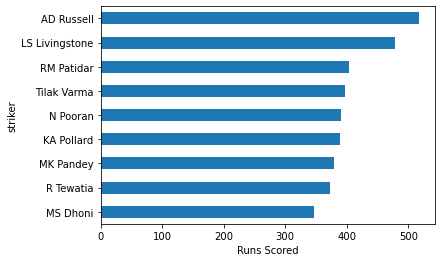

In [37]:
# Plotting the runs scored among all batters.
sdf.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('Runs Scored')
plt.show()

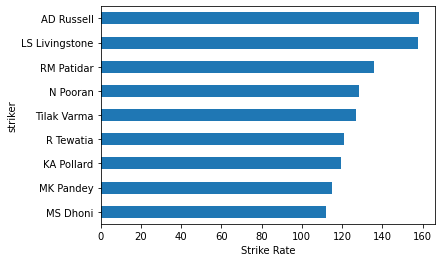

In [38]:
# Plotting the strike rate among all batters.
sdf.groupby(['striker'])['strike_rate'].sum().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('Strike Rate')
plt.show()

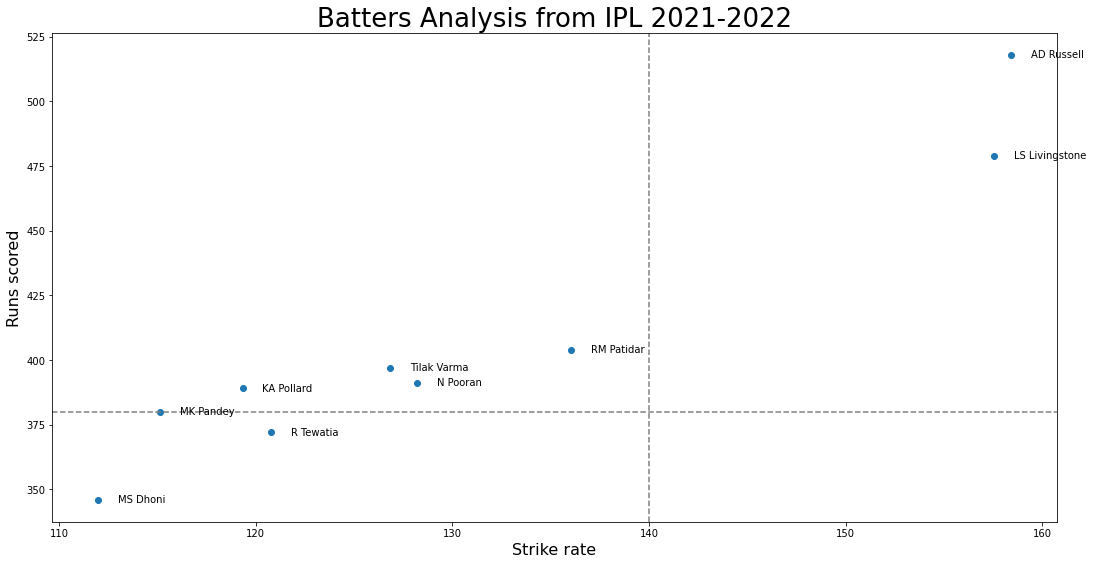

In [44]:
# Plotting a scatter graph to compare all the 9 batters taken into consideration as per criteria.
plt.figure(figsize = (18,9))
plt.scatter(sdf.strike_rate, sdf.runs_off_bat)

for i in range(len(sdf)):
     plt.text(sdf['strike_rate'][i] + 1, sdf['runs_off_bat'][i] - 1, sdf['striker'][i])
        
plt.title('Batters Analysis from IPL 2021-2022', fontsize = 26)
plt.xlabel('Strike rate', fontsize = 16)
plt.ylabel('Runs scored', fontsize = 16)
plt.axvline(140, ls='--', color = 'grey')
plt.axhline(380, ls='--', color = 'grey')
plt.show()

#### Conslusion

From the above analysis of MS Dhoni's statistics and comparison with other batters we can infer the following points:

Over the two IPL seasons from 2021 to 2022, we can observe that Dhoni has a very less strike rate and runs tally when compared to batters who similarly have faced 280 balls across seasons.

From the scatter plot we can observe that Dhoni falls in the quadrant where the runs and strike rate is too low compared to players in other quadrants.

Among the nine batters considered as per our criteria, Dhoni finishes a lowly ninth in both the runs and strike rate comparisons.

Hence the conclusion is that MS Dhoni is not good enough to bat in the upcoming seasons as his statistics is on the decrease.